In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

Using TensorFlow backend.


In [2]:
os.listdir('../input/brain-mri-images-for-brain-tumor-detection')

['no', 'brain_tumor_dataset', 'yes']

In [3]:
enc = OneHotEncoder()
enc.fit([[0], [1]]) 
def names(number):
    if(number == 0):
        return 'Tumor'
    else:
        return 'Normal'

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [4]:
data = []
paths = []
ans = []
for r, d, f in os.walk(r'../input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((128,128))
    x = np.array(x)
    if(x.shape == (128,128,3)):
        data.append(np.array(x))
        ans.append(enc.transform([[0]]).toarray())

In [5]:
paths = []
for r, d, f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((128,128))
    x = np.array(x)
    if(x.shape == (128,128,3)):
        data.append(np.array(x))
        ans.append(enc.transform([[1]]).toarray())

In [6]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [7]:
ans = np.array(ans)
ans = ans.reshape(139,2)

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)       

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data, ans, test_size=0.2, shuffle=True, random_state=69)

In [10]:
history = model.fit(x_train, y_train, epochs=30, batch_size=40, verbose=1,validation_data=(x_test, y_test))

Train on 111 samples, validate on 28 samples
Epoch 1/30
111/111 [==============================] - 7s 60ms/step - loss: 56.9680 - val_loss: 527.9547
Epoch 2/30
111/111 [==============================] - 5s 48ms/step - loss: 39.4996 - val_loss: 28.7905
Epoch 3/30
111/111 [==============================] - 5s 47ms/step - loss: 19.0489 - val_loss: 128.6321
Epoch 4/30
111/111 [==============================] - 5s 47ms/step - loss: 7.8108 - val_loss: 169.2684
Epoch 5/30
111/111 [==============================] - 6s 50ms/step - loss: 3.4848 - val_loss: 100.3482
Epoch 6/30
111/111 [==============================] - 6s 50ms/step - loss: 4.3887 - val_loss: 20.0370
Epoch 7/30
111/111 [==============================] - 5s 48ms/step - loss: 6.6478 - val_loss: 29.3397
Epoch 8/30
111/111 [==============================] - 5s 48ms/step - loss: 3.1927 - val_loss: 93.7215
Epoch 9/30
111/111 [==============================] - 5s 47ms/step - loss: 1.7674 - val_loss: 97.2654
Epoch 10/30
111/111 [=========

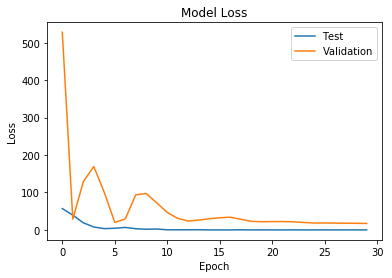

In [11]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

100.0% Confidence This Is Normal


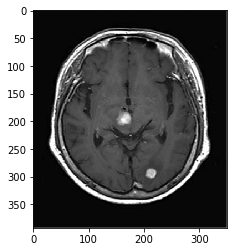

In [12]:
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Tumor


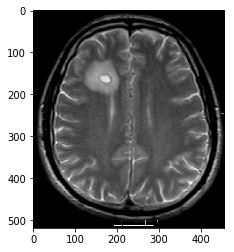

In [13]:
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))